# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 30

Group Members:
- Aland Mulia Pratama (13522124)
- Rizqika Mulia Pratama (13522126)
- Christian Justin Hendrawan (13522135)
- Auralea Alvinia Syaikha (13522148)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

pd.set_option('display.max_columns', 200)

## Import Dataset

In [2]:
# Read train dataset
basic_df = pd.read_csv('../dataset/train/basic_features_train.csv')
label_df = pd.read_csv('../dataset/train/labels_train.csv')
flow_df = pd.read_csv('../dataset/train/flow_features_train.csv')
time_df = pd.read_csv('../dataset/train/time_features_train.csv')
content_df = pd.read_csv('../dataset/train/content_features_train.csv')
additional_df = pd.read_csv('../dataset/train/additional_features_train.csv')
modified_df = pd.read_csv('../dataset/train/UNSW-NB15_features-modified.csv')


In [3]:
# Merge all of the data into one dataframe
train_df = pd.DataFrame()
train_df['id'] = basic_df['id']
train_df = pd.merge(train_df, basic_df, on='id')
train_df = pd.merge(train_df, flow_df, on='id')
train_df = pd.merge(train_df, time_df, on='id')
train_df = pd.merge(train_df, content_df, on='id')
train_df = pd.merge(train_df, additional_df, on='id')
train_df = pd.merge(train_df, label_df, on='id')

In [4]:
# Show the first 20 rows of the dataframe
train_df.head(20)

,id,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,sload,dload,spkts,dpkts,proto,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,swin,dwin,stcpb,dtcpb,smean,dmean,trans_depth,response_body_len,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,0,FIN,2.736664,13350.0,548216.0,31.0,29.0,21.0,197.0,-,3.885899e+04,1.598925e+06,232.0,438.0,tcp,4449.110313,3234.831566,11.845558,6.261361,NaN,0.000444,0.000114,255.0,255.0,4.864839e+08,4.926043e+08,58.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,NaN,5.0,4.0,2.0,1.0,5.0,Normal,0
1,1,INT,0.000009,114.0,0.0,254.0,0.0,0.0,0.0,dns,5.066666e+07,0.000000e+00,2.0,0.0,udp,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.000000e+00,0.000000e+00,57.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,Generic,1
2,2,FIN,5.788526,6102.0,3892.0,254.0,252.0,13.0,13.0,-,8.199669e+03,5.221364e+03,36.0,34.0,tcp,8561.040438,249.950547,165.386453,172.345750,0.158826,0.057902,0.100924,255.0,255.0,3.835852e+09,2.010029e+08,170.0,114.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,4.0,4.0,2.0,2.0,1.0,1.0,4.0,Exploits,1
3,3,FIN,3.849634,25160.0,NaN,31.0,29.0,38.0,390.0,-,5.216912e+04,2.272451e+06,448.0,858.0,tcp,4053.086020,2918.730804,8.669644,4.496707,0.000558,0.000448,NaN,255.0,255.0,NaN,6.614436e+08,56.0,1276.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,9.0,3.0,2.0,2.0,1.0,6.0,Normal,0
4,4,CON,0.001052,130.0,162.0,NaN,29.0,0.0,0.0,dns,4.942966e+05,6.159696e+05,2.0,2.0,udp,0.000000,0.000000,0.008000,0.007000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,65.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,3.0,1.0,NaN,1.0,Normal,0
5,5,INT,0.000005,114.0,0.0,254.0,0.0,0.0,0.0,dns,9.120000e+07,0.000000e+00,2.0,0.0,udp,NaN,0.000000,0.005000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,57.0,0.0,0.0,0.0,0.0,2.0,0.0,NaN,0.0,34.0,34.0,25.0,25.0,25.0,12.0,34.0,Generic,1
6,6,INT,0.000008,114.0,0.0,254.0,0.0,0.0,0.0,dns,5.700000e+07,0.000000e+00,2.0,0.0,udp,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,NaN,57.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,9.0,9.0,NaN,9.0,9.0,9.0,9.0,Generic,1
7,7,FIN,1.465899,28660.0,NaN,254.0,252.0,14.0,3.0,-,1.518140e+05,4.169455e+03,34.0,16.0,tcp,NaN,125.553867,43.671909,NaN,0.140336,0.090759,0.049577,255.0,255.0,3.680557e+09,5.902739e+08,843.0,51.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,4.0,1.0,2.0,NaN,1.0,4.0,Fuzzers,1
8,8,FIN,0.034137,NaN,3380.0,31.0,29.0,18.0,8.0,smtp,8.617278e+06,7.733544e+05,52.0,42.0,tcp,42.179459,NaN,0.689755,0.819268,0.000667,0.000542,NaN,255.0,255.0,4.019494e+09,1.875135e+09,721.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,NaN,1.0,NaN,1.0,Normal,0
9,9,FIN,0.022733,2958.0,33044.0,31.0,29.0,7.0,18.0,-,1.019487e+06,1.139630e+07,48.0,50.0,tcp,25.926994,26.607684,0.477085,0.452469,0.000682,0.000559,0.000123,255.0,255.0,2.991578e+09,3.016561e+09,62.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,6.0,5.0,2.0,2.0,1.0,1.0,3.0,Normal,0


# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

In [10]:
# 1. Basic statistics and info

print("Dataset Shape:", train_df.shape)
print("\nFeature Names:")
print(train_df.columns.tolist())
print("\nBasic Statistics:")
print(train_df.describe())

Dataset Shape: (175341, 44)

Feature Names:
['id', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'proto', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'label']

Basic Statistics:
                  id            dur        sbytes        dbytes  \
count  175341.000000  166619.000000  1.667800e+05  1.664720e+05   
mean    87670.000000       1.359299  8.734079e+03  1.493589e+04   
std     50616.731112       6.485386  1.712289e+05  1.430150e+05   
min         0.000000       0.000000  2.800000e+01  0.000000e+00   
25%     43835.000000       0.000008  1.140000e+02  0.000000e+00   
50%     87670.000000      

In [11]:
# 2. Check missing values
missing_values = train_df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])


Missing Values:
state                8805
dur                  8722
sbytes               8561
dbytes               8869
sttl                 8825
dttl                 8654
sloss                8794
dloss                8978
service              8791
sload                8786
dload                8837
spkts                8654
dpkts                8686
proto                8826
sjit                 8738
djit                 8846
sinpkt               8707
dinpkt               8734
tcprtt               8836
synack               8736
ackdat               8595
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
is_sm_ips_ports      8746
ct_state_ttl         8635
ct_flw_http_mthd     8647
is_ftp_login         8647
ct_ftp_cmd           8842
ct_srv_src           8851
ct_srv_dst           8774
ct_dst_ltm           8738
ct_src_ltm           

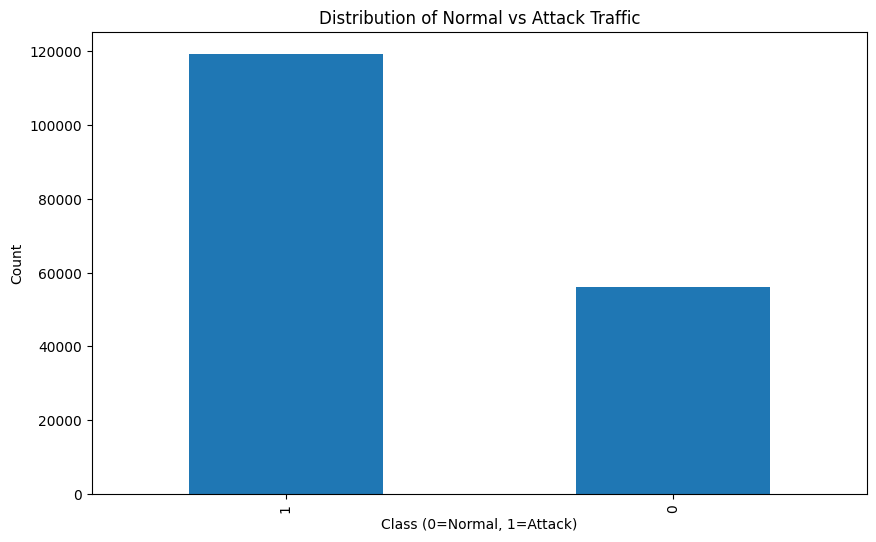

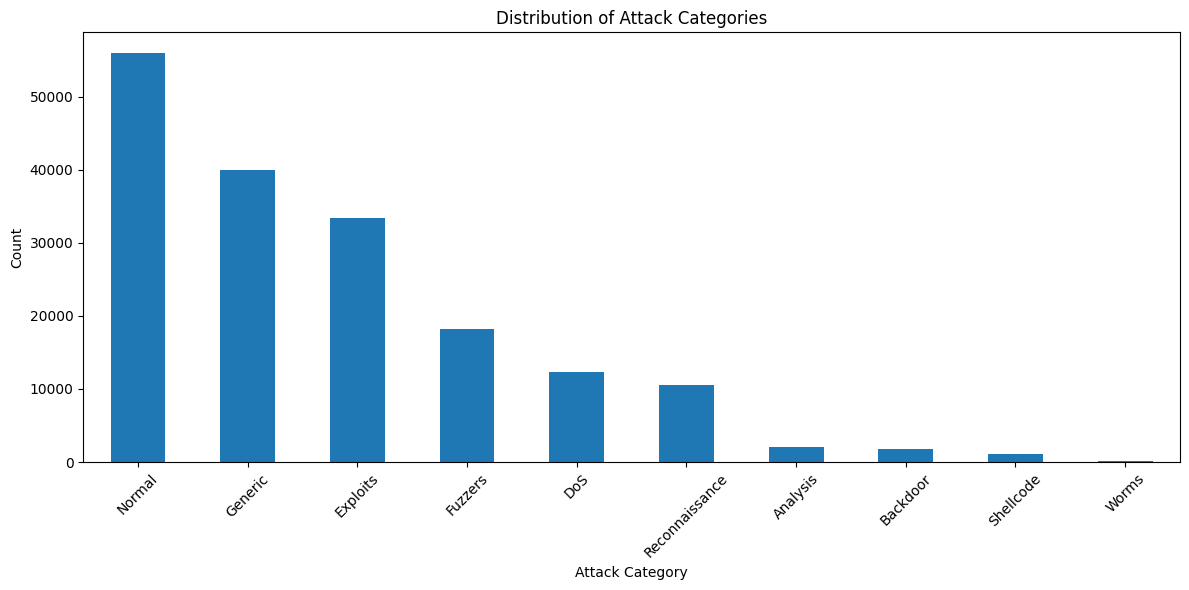

In [13]:
# 3. Feature distributions and class balance
plt.figure(figsize=(10, 6))
train_df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Normal vs Attack Traffic')
plt.xlabel('Class (0=Normal, 1=Attack)')
plt.ylabel('Count')
plt.show()

# Attack category distribution
plt.figure(figsize=(12, 6))
train_df['attack_cat'].value_counts().plot(kind='bar')
plt.title('Distribution of Attack Categories')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

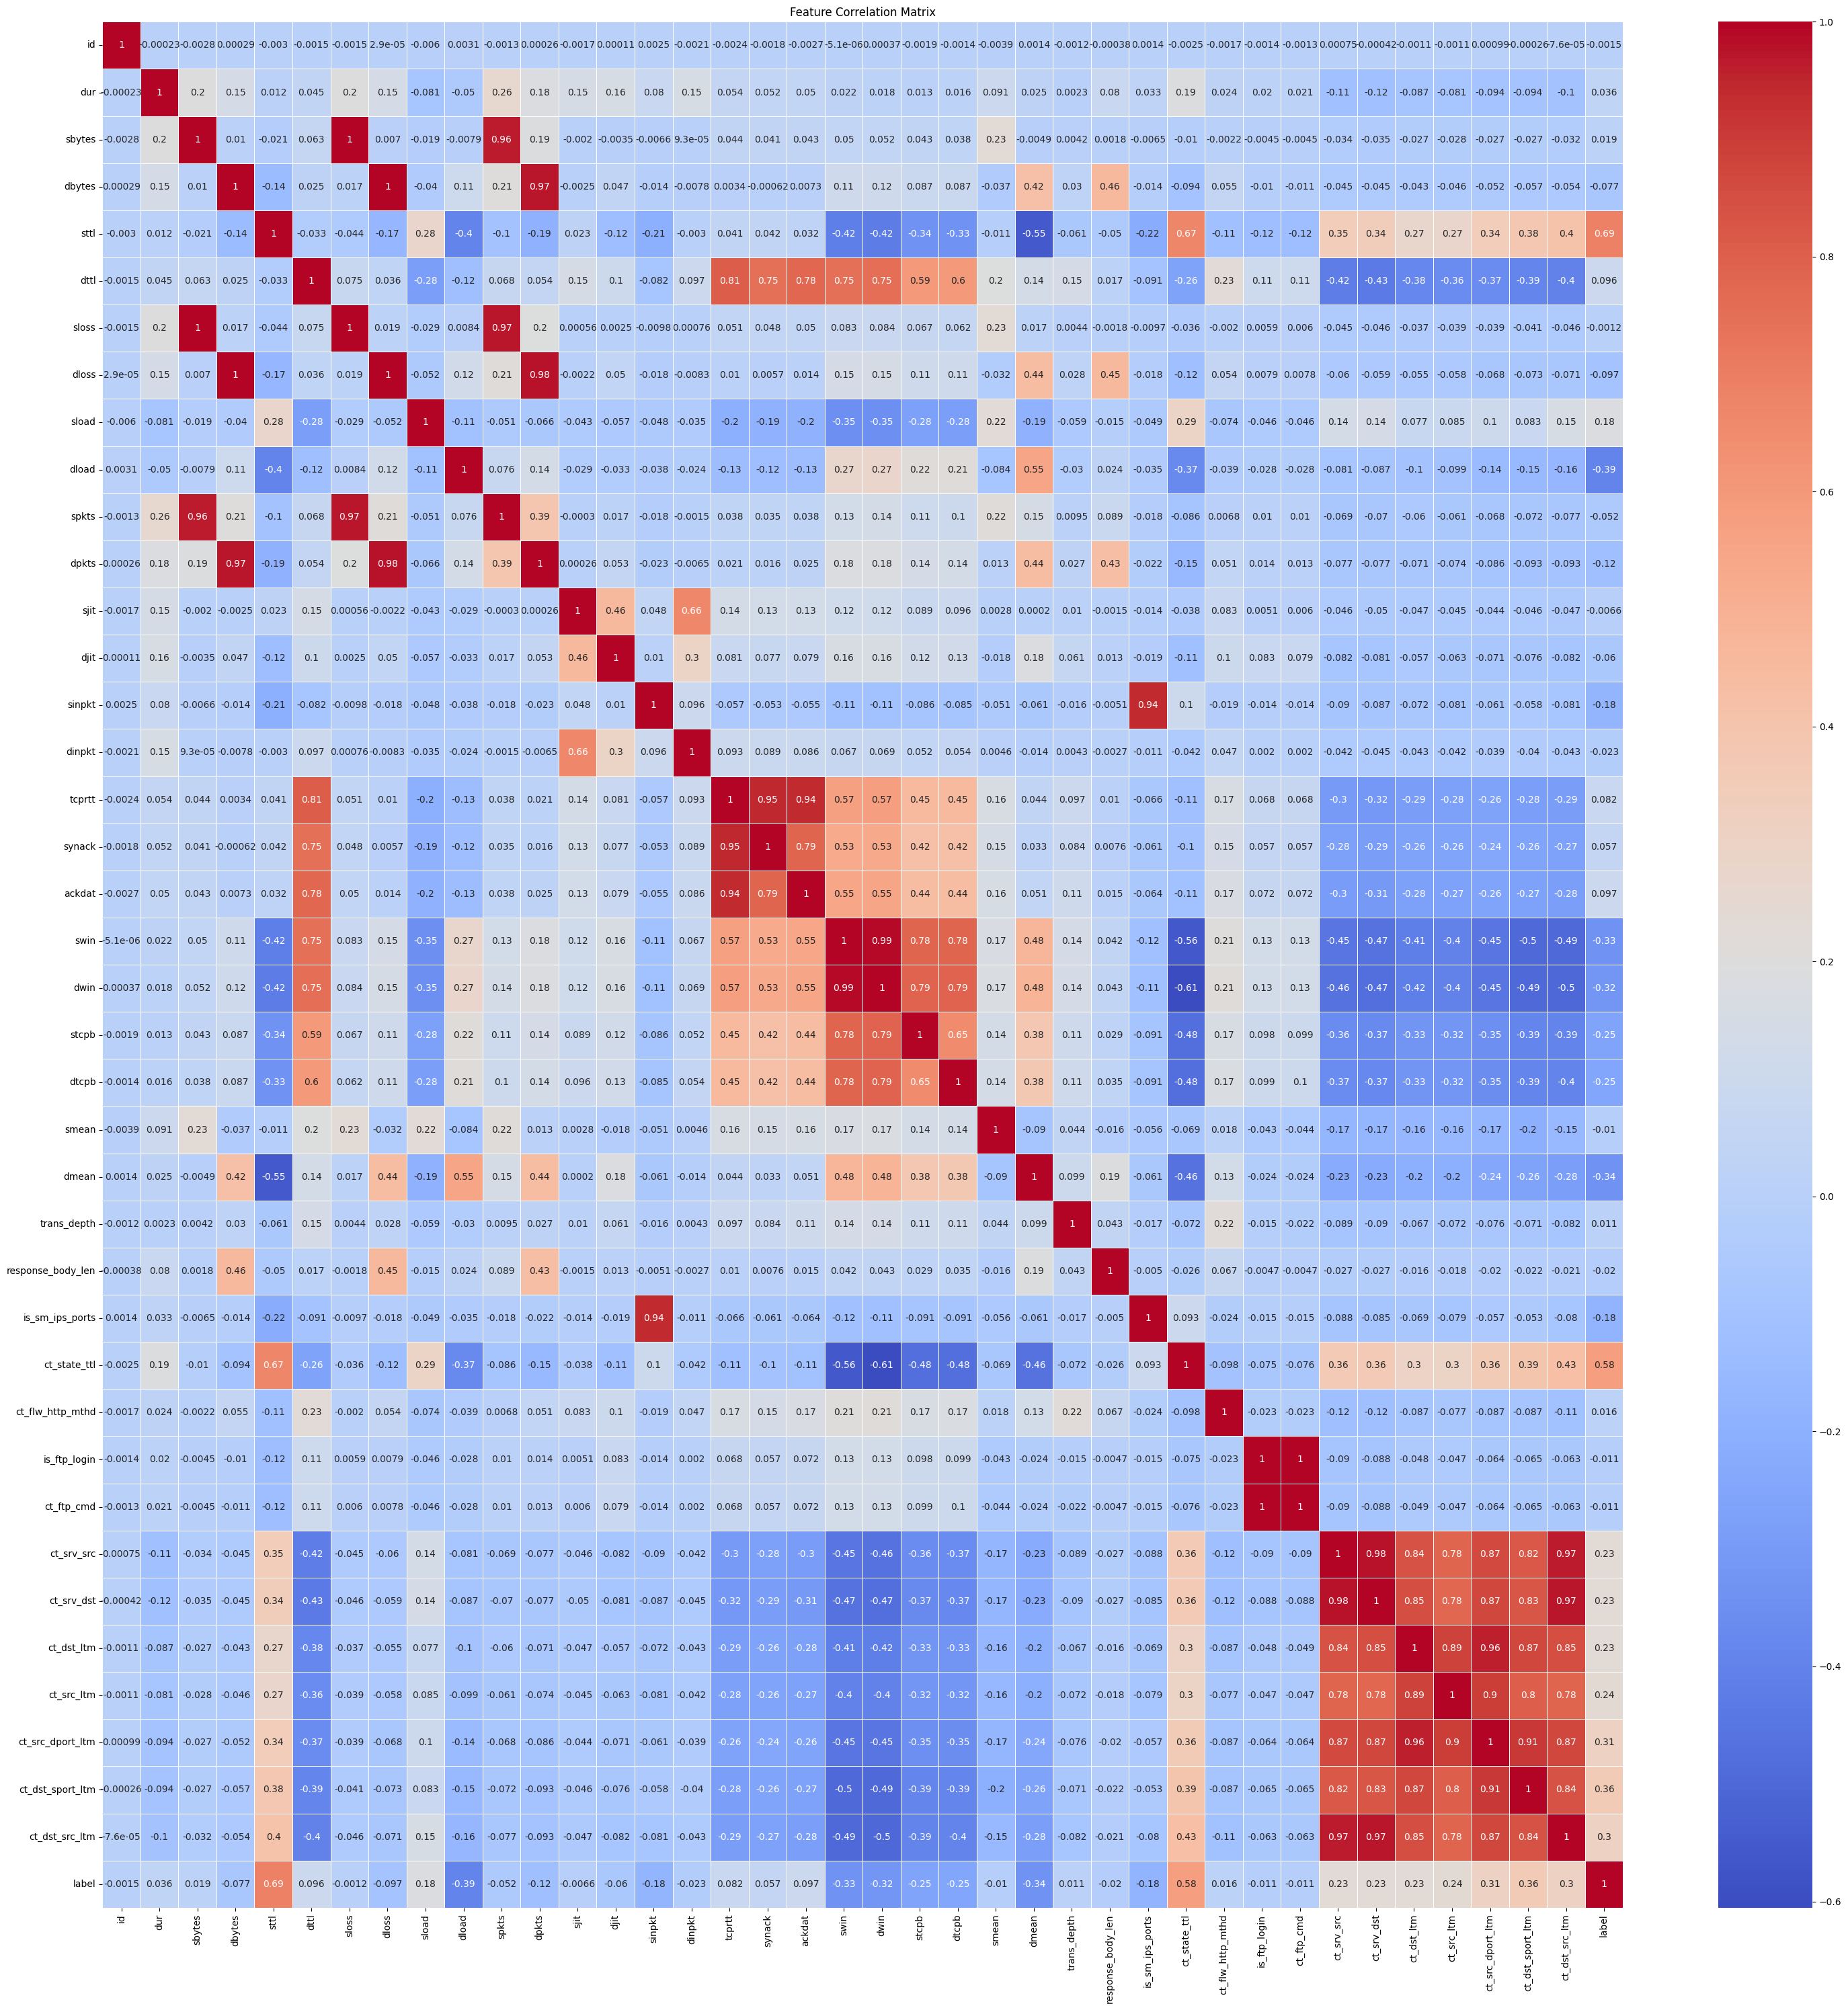

In [15]:
# 4. Correlation analysis
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train_df[numeric_cols].corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

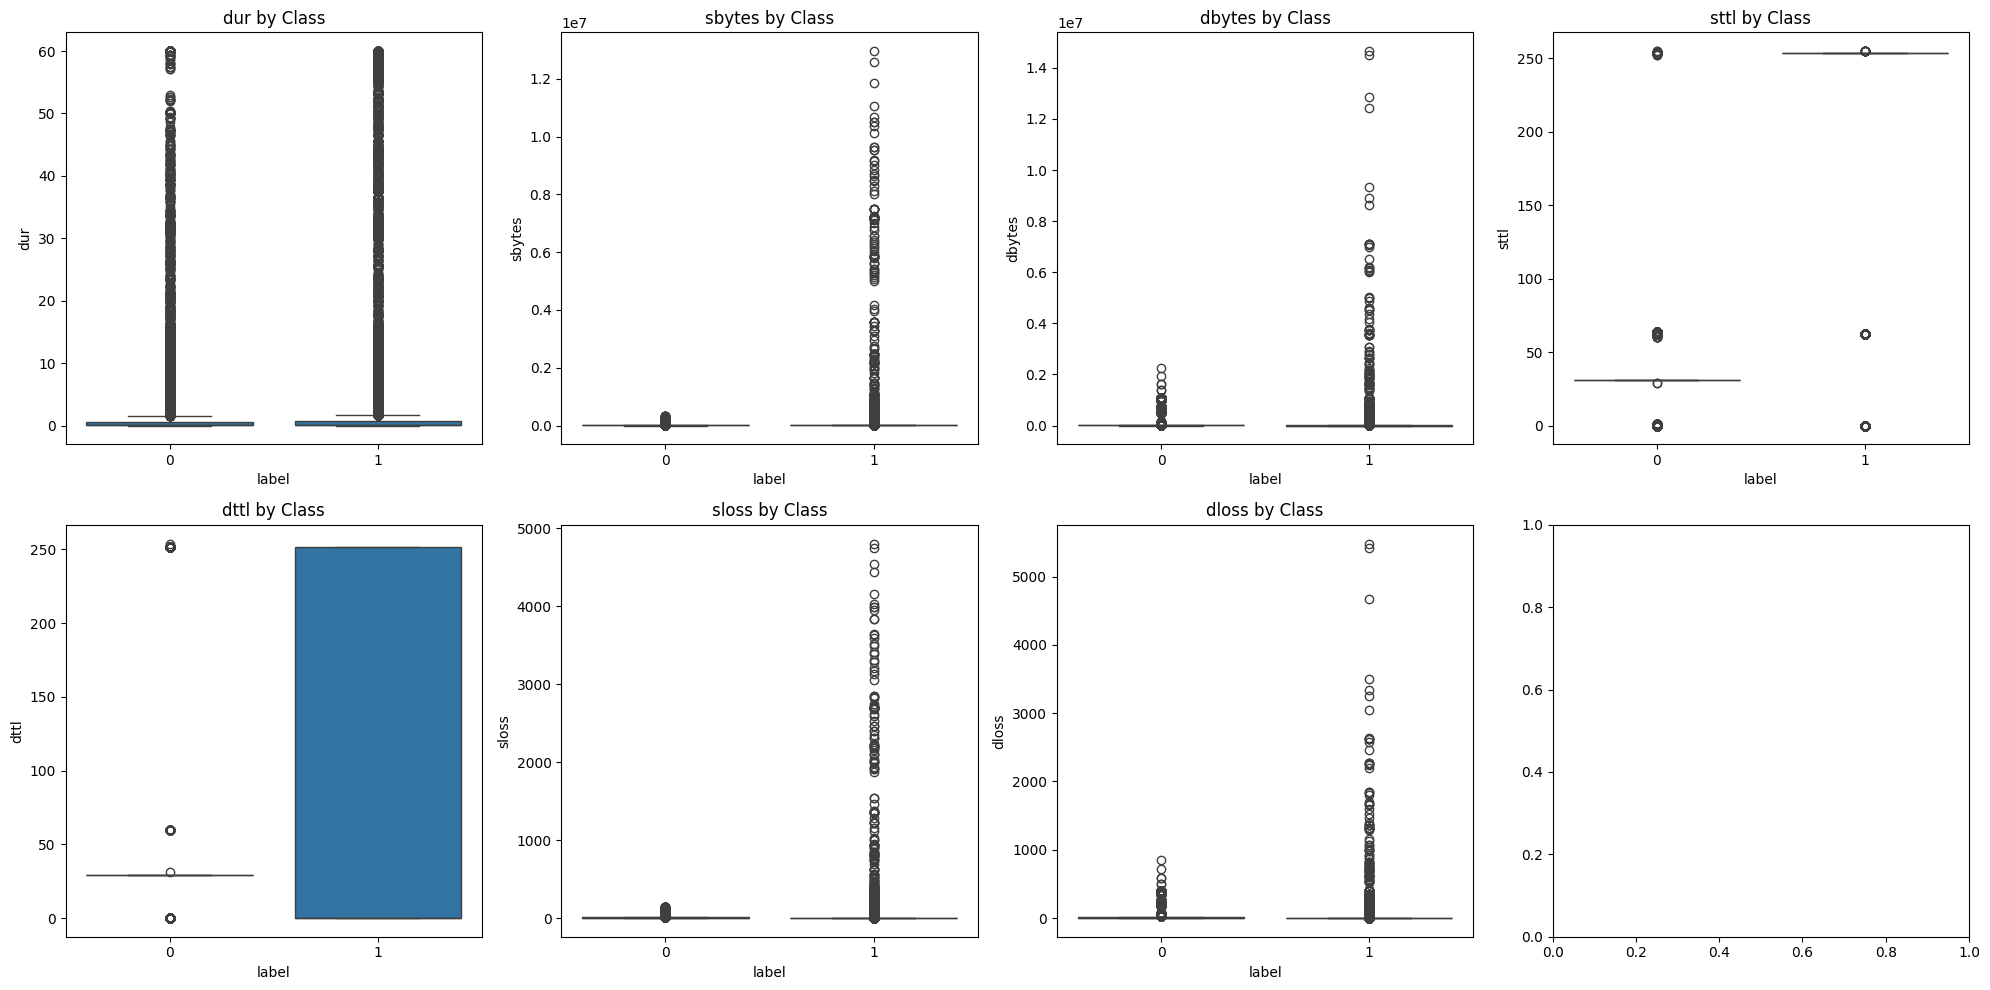

In [16]:
# 5. Box plots for key numeric features
key_features = ['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss']
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, col in enumerate(key_features):
    sns.boxplot(data=train_df, x='label', y=col, ax=axes[idx])
    axes[idx].set_title(f'{col} by Class')

plt.tight_layout()
plt.show()

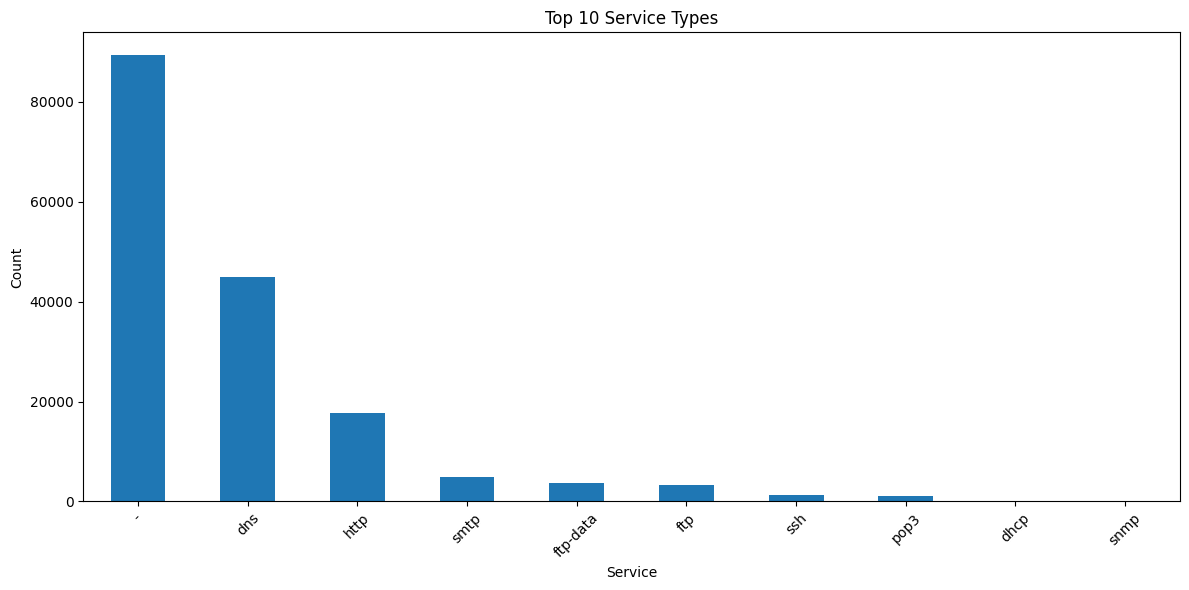

In [18]:
# 6. Additional visualizations
# Service type distribution
plt.figure(figsize=(12, 6))
train_df['service'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Service Types')
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [5]:
# After merging data into train_df:

from sklearn.model_selection import train_test_split

# Split data while preserving class distribution
train_set, val_set = train_test_split(
    train_df,
    test_size=0.2,  # 80% train, 20% validation
    random_state=42,  # For reproducibility
    stratify=train_df['attack_cat']  # Maintain attack category distribution
)

# Verify split sizes
print("Original dataset:", train_df.shape)
print("Training set:", train_set.shape)
print("Validation set:", val_set.shape)

# Verify class distribution
print("\nClass distribution in splits:")
print("\nOriginal:")
print(train_df['attack_cat'].value_counts(normalize=True))
print("\nTraining:")
print(train_set['attack_cat'].value_counts(normalize=True))
print("\nValidation:")
print(val_set['attack_cat'].value_counts(normalize=True))

Original dataset: (175341, 44)
Training set: (140272, 44)
Validation set: (35069, 44)

Class distribution in splits:

Original:
attack_cat
Normal            0.319378
Generic           0.228127
Exploits          0.190446
Fuzzers           0.103706
DoS               0.069944
Reconnaissance    0.059832
Analysis          0.011406
Backdoor          0.009958
Shellcode         0.006462
Worms             0.000741
Name: proportion, dtype: float64

Training:
attack_cat
Normal            0.319379
Generic           0.228128
Exploits          0.190444
Fuzzers           0.103706
DoS               0.069943
Reconnaissance    0.059834
Analysis          0.011406
Backdoor          0.009959
Shellcode         0.006459
Worms             0.000741
Name: proportion, dtype: float64

Validation:
attack_cat
Normal            0.319370
Generic           0.228122
Exploits          0.190453
Fuzzers           0.103710
DoS               0.069948
Reconnaissance    0.059825
Analysis          0.011406
Backdoor          0.

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [6]:
# Check missing values in training set
print("Missing values in training set:")
print(train_set.isnull().sum()[train_set.isnull().sum() > 0])

# Calculate percentage of missing values
missing_percentages = (train_set.isnull().sum() / len(train_set)) * 100
print("\nPercentage of missing values:")
print(missing_percentages[missing_percentages > 0])

Missing values in training set:
state                7092
dur                  6976
sbytes               6811
dbytes               7093
sttl                 7097
dttl                 6923
sloss                7114
dloss                7158
service              6978
sload                7070
dload                6995
spkts                6954
dpkts                6993
proto                7059
sjit                 6999
djit                 7033
sinpkt               6940
dinpkt               6955
tcprtt               7035
synack               6881
ackdat               6907
swin                 6971
dwin                 7043
stcpb                6921
dtcpb                7067
smean                7017
dmean                7122
trans_depth          7033
response_body_len    7035
is_sm_ips_ports      6998
ct_state_ttl         6847
ct_flw_http_mthd     6945
is_ftp_login         6877
ct_ftp_cmd           7026
ct_srv_src           7080
ct_srv_dst           7008
ct_dst_ltm           6959
ct_src

In [7]:
def handle_missing_data(df):
    print("Before handling missing values:")
    print(df.isnull().sum()[df.isnull().sum() > 0])
    
    # Make a copy to avoid modifying original
    df_clean = df.copy()
    
    # Separate columns by type
    numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df_clean.select_dtypes(include=['object']).columns

    # 1. Handle numeric features
    for col in numeric_cols:
        if df_clean[col].isnull().sum() > 0:
            # Use median for features with outliers
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())
    
    # 2. Handle categorical features
    for col in categorical_cols:
        if df_clean[col].isnull().sum() > 0:
            # Use mode for categorical
            df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
    
    print("\nAfter handling missing values:")
    print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])
    
    return df_clean

# Apply missing data handling
train_df_clean = handle_missing_data(train_set)


Before handling missing values:
state                7092
dur                  6976
sbytes               6811
dbytes               7093
sttl                 7097
dttl                 6923
sloss                7114
dloss                7158
service              6978
sload                7070
dload                6995
spkts                6954
dpkts                6993
proto                7059
sjit                 6999
djit                 7033
sinpkt               6940
dinpkt               6955
tcprtt               7035
synack               6881
ackdat               6907
swin                 6971
dwin                 7043
stcpb                6921
dtcpb                7067
smean                7017
dmean                7122
trans_depth          7033
response_body_len    7035
is_sm_ips_ports      6998
ct_state_ttl         6847
ct_flw_http_mthd     6945
is_ftp_login         6877
ct_ftp_cmd           7026
ct_srv_src           7080
ct_srv_dst           7008
ct_dst_ltm           6959
ct_src

### The reasoning behind choosing Data Imputation with Mean/Median/Mode Strategy : 
1. **Systematic Pattern in Missing Data**  
    The consistent ~5% missing rate across all features (ranging from 4.85% to 5.10%) indicates a systematic pattern in how network traffic data was collected or processed, rather than random missing values. This suggests that using imputation would maintain the underlying data patterns rather than introducing bias.

2. **Data Volume Preservation**  
    With approximately 8,750 samples (5% of data) containing missing values, deletion would significantly reduce our dataset size. In network security, every sample could contain valuable attack patterns, and removing this much data could particularly impact our ability to detect rare attack types.

3. **Feature Interdependence**  
    Network traffic features are inherently interconnected (e.g., source bytes with destination bytes, packet counts with byte counts). Using median/mode imputation preserves these relationships better than deletion, as it maintains the natural distributions and correlations between features.

4. **Practical Implementation Benefits**  
    Using median for numeric and mode for categorical data provides a computationally efficient, easily reproducible approach that can be consistently applied to both training and validation sets while preserving the dataset's size and feature distributions.

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [ ]:
# Write your code here

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [ ]:
# Write your code here

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

Applying multiple feature engineering strategies...

Feature engineering summary:
- Created new network metrics
- Added duration categories
- Selected top features

New Traffic Flow Features (first 5 rows):
        bytes_ratio  packet_ratio  avg_bytes_per_packet  total_loss_ratio  \
169184   114.000000      0.666667             22.800000          0.000000   
43790      0.527607      2.000000             82.666667          0.000000   
169830   114.000000      2.000000             38.000000          0.000000   
139375    19.353645      1.692308            534.400000          0.285714   
75510    114.000000      2.000000             38.000000          0.000000   

        bytes_per_second  
169184       1139.897409  
43790        2479.826412  
169830       1139.954402  
139375      19085.928516  
75510        1139.965801  

Duration Categories Distribution:
duration_cat
instant       86468
very short    28556
short         20046
medium         3167
zero           2035
Name: count, dtype: 

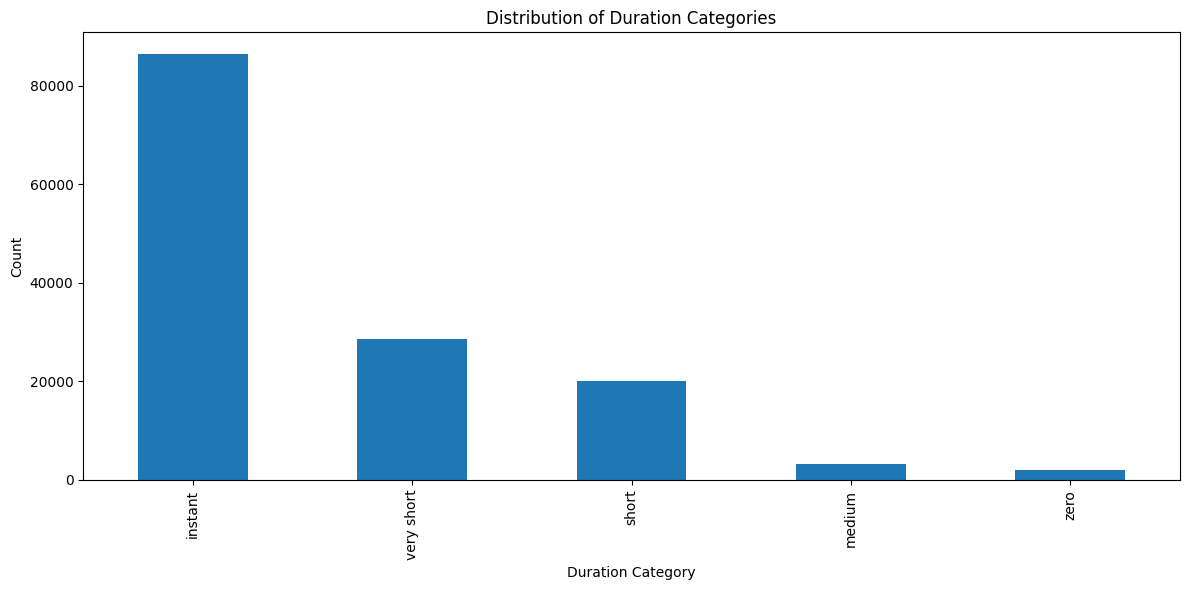

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

def enhanced_network_features(df):
    """Comprehensive feature engineering for network traffic"""
    print("Applying multiple feature engineering strategies...")
    df_new = df.copy()
    
    # 1. Creating New Features 
    # Traffic Flow Ratios
    df_new['bytes_ratio'] = df_new['sbytes'] / (df_new['dbytes'] + 1)
    df_new['packet_ratio'] = df_new['spkts'] / (df_new['dpkts'] + 1)
    df_new['avg_bytes_per_packet'] = (df_new['sbytes'] + df_new['dbytes']) / (df_new['spkts'] + df_new['dpkts'] + 1)
    df_new['total_loss_ratio'] = (df_new['sloss'] + df_new['dloss']) / (df_new['spkts'] + df_new['dpkts'] + 1)
    df_new['bytes_per_second'] = (df_new['sbytes'] + df_new['dbytes']) / (df_new['dur'] + 0.1)
    
    # 2. Binning for Specific Metrics
    df_new['duration_cat'] = pd.cut(
        df_new['dur'],
        bins=[-np.inf, 0.0, 0.1, 1.0, 10.0, 60.0],
        labels=['zero', 'instant', 'very short', 'short', 'medium']
    )
    
    # 3. Feature Selection (Top 20 most important)
    numeric_cols = df_new.select_dtypes(include=['float64', 'int64']).columns
    selector = SelectKBest(f_classif, k=20)
    X = df_new[numeric_cols].drop(['label'], axis=1, errors='ignore')
    y = df_new['label']
    selected_features = X.columns[selector.fit(X, y).get_support()].tolist()
    
    print("\nFeature engineering summary:")
    print("- Created new network metrics")
    print("- Added duration categories")
    print("- Selected top features")
    
    return df_new, selected_features

# Apply enhanced feature engineering and display results
train_df_engineered, selected_features = enhanced_network_features(train_df_clean)

# 1. Show new features created
print("\nNew Traffic Flow Features (first 5 rows):")
new_features = ['bytes_ratio', 'packet_ratio', 'avg_bytes_per_packet', 'total_loss_ratio', 'bytes_per_second']
print(train_df_engineered[new_features].head())

# 2. Show duration categories distribution
print("\nDuration Categories Distribution:")
print(train_df_engineered['duration_cat'].value_counts())

# 3. Show selected important features
print("\nTop 20 Selected Features:")
print(selected_features)

# 4. Basic statistics of new features
print("\nStatistics of New Features:")
print(train_df_engineered[new_features].describe())

# 5. Binning for specific metrics
plt.figure(figsize=(12, 6))
train_df_engineered['duration_cat'].value_counts().plot(kind='bar')
plt.title('Distribution of Duration Categories')
plt.xlabel('Duration Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### The reasoning behind choosing Feature Selection, Creating New Features Strategy, and Binning or Discretization for Network Traffic Data : 
1. **Comprehensive Pattern Detection**  
    Network traffic analysis requires understanding data at multiple levels of abstraction. By implementing three complementary strategies - feature selection, new feature creation, and binning - we create a robust feature set that captures different aspects of network behavior. Feature selection helps identify the most relevant metrics, new feature creation reveals hidden relationships through ratios and combinations, while binning helps categorize continuous data like duration into meaningful groups. This multi-faceted approach is particularly valuable for detecting various attack patterns, as different types of attacks may manifest in different ways within the network data.

2. **Balance Between Information and Complexity**  
    Using these three specific strategies provides an optimal balance between capturing useful patterns and maintaining manageable complexity. Feature selection reduces noise by keeping only the most informative features, new feature creation adds domain-specific insights through engineered combinations, and binning helps handle outliers and creates more interpretable categories. This combination ensures we're not overwhelming the model with redundant or irrelevant features while still maintaining enough information to detect subtle attack patterns.

3. **Practical Implementation Benefits**   
    The chosen strategies complement each other in implementation. Feature selection helps control the dimensionality after we create new features, while binning helps normalize certain metrics that might be skewed. This synergy between strategies makes the feature engineering process more effective than using any single strategy alone. For example, after creating new ratio features, feature selection can help identify which of these new features are most useful, while binning helps handle any extreme values that might appear in these ratios.

4. **Network Security Domain Alignment**  
    These three strategies align well with network security requirements. Network attacks often manifest in relationships between metrics (handled by new feature creation), have varying importance of different indicators (addressed by feature selection), and include temporal patterns that benefit from categorization (managed through binning). Together, they create a feature set that security professionals can interpret while maintaining the mathematical properties needed for effective machine learning.

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [39]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [ ]:
# Write your code here

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [ ]:
# Write your code here

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [ ]:
# Write your code here

### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [ ]:
# Write your code here

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

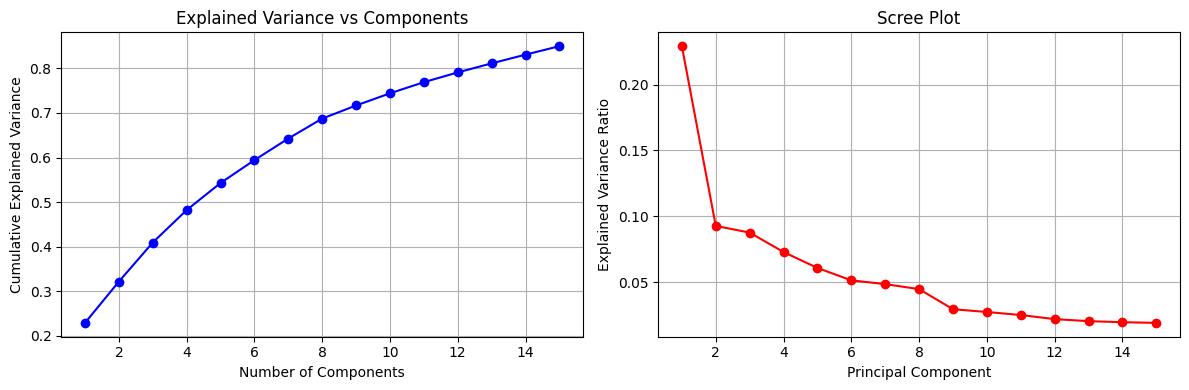

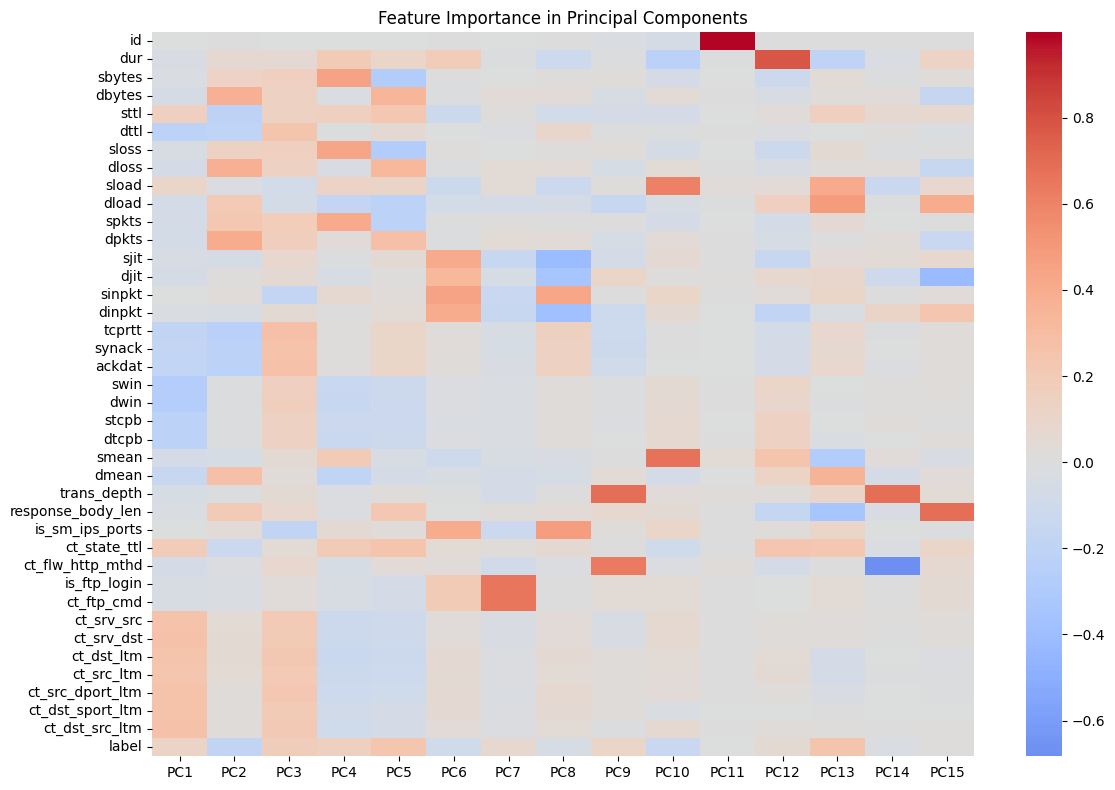


Explained Variance Ratios:
PC1: 0.2291 (0.2291 cumulative)
PC2: 0.0927 (0.3218 cumulative)
PC3: 0.0876 (0.4093 cumulative)
PC4: 0.0728 (0.4822 cumulative)
PC5: 0.0607 (0.5429 cumulative)
PC6: 0.0513 (0.5942 cumulative)
PC7: 0.0484 (0.6426 cumulative)
PC8: 0.0447 (0.6873 cumulative)
PC9: 0.0294 (0.7167 cumulative)
PC10: 0.0273 (0.7440 cumulative)
PC11: 0.0250 (0.7690 cumulative)
PC12: 0.0219 (0.7908 cumulative)
PC13: 0.0203 (0.8112 cumulative)
PC14: 0.0195 (0.8307 cumulative)
PC15: 0.0190 (0.8497 cumulative)

Top 5 Contributing Features per Component:

PC1:
ct_dst_src_ltm    0.268106
dwin              0.265690
ct_srv_dst        0.263535
swin              0.263230
ct_srv_src        0.260923
dtype: float64

PC2:
dpkts     0.397176
dloss     0.378975
dbytes    0.377063
dmean     0.276567
tcprtt    0.232063
dtype: float64

PC3:
tcprtt              0.275301
ackdat              0.262991
synack              0.259119
dttl                0.243422
ct_src_dport_ltm    0.230996
dtype: float64


In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

class NetworkDimensionalityReducer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=15):
        self.n_components = n_components
        self.scaler = StandardScaler()
        self.pca = PCA(n_components=n_components)
        self.feature_names_ = None
        
    def fit(self, X, y=None):
        """Learn PCA parameters from training data"""
        self.feature_names_ = X.select_dtypes(include=['float64', 'int64']).columns
        X_numeric = X[self.feature_names_]
        X_scaled = self.scaler.fit_transform(X_numeric)
        self.pca.fit(X_scaled)
        return self
        
    def transform(self, X):
        """Apply PCA transformation"""
        X_numeric = X[self.feature_names_]
        X_scaled = self.scaler.transform(X_numeric)
        X_pca = self.pca.transform(X_scaled)
        return pd.DataFrame(
            X_pca,
            columns=[f'PC{i+1}' for i in range(self.n_components)],
            index=X.index
        )
    
    def plot_analysis(self):
        # 1. Explained Variance Plot
        plt.figure(figsize=(12, 4))
        plt.subplot(121)
        cumsum = np.cumsum(self.pca.explained_variance_ratio_)
        plt.plot(range(1, len(cumsum) + 1), cumsum, 'bo-')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.title('Explained Variance vs Components')
        plt.grid(True)

        # 2. Scree Plot
        plt.subplot(122)
        plt.plot(range(1, len(self.pca.explained_variance_ratio_) + 1), 
                self.pca.explained_variance_ratio_, 'ro-')
        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance Ratio')
        plt.title('Scree Plot')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # 3. Feature Importance Heatmap
        plt.figure(figsize=(12, 8))
        feature_importance = pd.DataFrame(
            self.pca.components_.T,
            columns=[f'PC{i+1}' for i in range(self.n_components)],
            index=self.feature_names_
        )
        sns.heatmap(feature_importance, cmap='coolwarm', center=0)
        plt.title('Feature Importance in Principal Components')
        plt.tight_layout()
        plt.show()

        # Print numerical results
        print("\nExplained Variance Ratios:")
        for i, ratio in enumerate(self.pca.explained_variance_ratio_, 1):
            print(f"PC{i}: {ratio:.4f} ({cumsum[i-1]:.4f} cumulative)")

        # Top contributing features
        print("\nTop 5 Contributing Features per Component:")
        for i in range(3):  # Show for first 3 PCs
            print(f"\nPC{i+1}:")
            pc_loadings = pd.Series(
                self.pca.components_[i],
                index=self.feature_names_
            ).abs()
            print(pc_loadings.nlargest(5))

# Usage
reducer = NetworkDimensionalityReducer(n_components=15)
reducer.fit(train_df_clean)
X_reduced = reducer.transform(train_df_clean)
reducer.plot_analysis()

### The reasoning behind choosing Principal Component Analysis (PCA) Strategy for for Network Traffic Dimensionality Reduction : 
1. **Dimensionality Reduction with Interpretability**  
    Principal Component Analysis provides an ideal balance between reducing data complexity and maintaining interpretability in network traffic analysis. By achieving 85% variance explanation with just 15 components (down from many original features), we significantly simplify the data while preserving crucial attack patterns. The linear transformation nature of PCA aligns well with network traffic metrics, where many features have linear relationships (like bytes and packets). This makes PCA particularly suitable compared to non-linear methods like t-SNE or autoencoders, which might overcomplicate the analysis without providing significant benefits.

2. **Computational Efficiency and Scalability**  
    Network traffic data often includes many correlated features and high dimensionality. PCA's efficient computation makes it particularly suitable for large-scale network analysis, especially compared to more complex alternatives. Our results show a clear hierarchical importance of components (22.91% for PC1, gradually decreasing), indicating that PCA effectively captures the major patterns in the data while reducing noise. This efficiency is crucial for real-time or near-real-time network security applications.

3. **Clear Component Contribution Analysis**  
    The cumulative explained variance results (54% with 5 components, 74% with 10, and 85% with 15) provide transparent insight into how much information we retain. This transparency is vital in network security, where understanding the contribution of different features to attack detection is crucial. The gradual decrease in component importance suggests we're capturing real patterns rather than noise, making our dimensionality reduction both effective and trustworthy.

4. **Practical Implementation Benefits**  
    PCA's compatibility with sklearn's transformer pattern makes it easy to integrate into our preprocessing pipeline. The ability to reverse-engineer component meanings through feature importance analysis helps security analysts understand what patterns the model is detecting. This balance of technical effectiveness and practical interpretability makes PCA the optimal choice for network traffic dimensionality reduction.

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [ ]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [ ]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [ ]:
# Write your code here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [ ]:
# Type your code here

## B. Naive Bayes

In [ ]:
# Type your code here

## C. ID3

In [ ]:
#ID3 from scratch versi 1

import numpy as np
from collections import Counter

class Node:
    """Node class for decision tree"""
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature      # Feature index for splitting
        self.threshold = threshold  # Threshold value for the split
        self.left = left          # Left subtree
        self.right = right        # Right subtree
        self.value = value        # Leaf node value

class ID3Classifier:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        self.root = None
        
    def entropy(self, y):
        """Calculate entropy of label array y"""
        if len(y) == 0:
            return 0
        # Calculate probability of each class
        counts = Counter(y)
        probs = np.array([count/len(y) for count in counts.values()])
        # Calculate entropy
        return -np.sum(probs * np.log2(probs + 1e-10))
    
    def information_gain(self, y, X_column, threshold):
        """Calculate information gain for a split"""
        parent_entropy = self.entropy(y)
        
        # Create children
        left_mask = X_column <= threshold
        right_mask = ~left_mask
        
        if len(y[left_mask]) == 0 or len(y[right_mask]) == 0:
            return 0
        
        # Calculate weighted entropy of children
        n = len(y)
        n_l, n_r = len(y[left_mask]), len(y[right_mask])
        e_l, e_r = self.entropy(y[left_mask]), self.entropy(y[right_mask])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r
        
        return parent_entropy - child_entropy
    
    def find_best_split(self, X, y):
        """Find best feature and threshold for split"""
        best_gain = -1
        best_feature = None
        best_threshold = None
        
        n_features = X.shape[1]
        
        for feature in range(n_features):
            # Use percentile points as thresholds
            X_column = X[:, feature]
            thresholds = np.percentile(X_column, [25, 50, 75])
            
            for threshold in thresholds:
                gain = self.information_gain(y, X_column, threshold)
                
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold
                    
        return best_feature, best_threshold
    
    def build_tree(self, X, y, depth=0):
        """Recursively build decision tree"""
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        
        # Stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or n_classes == 1:
            leaf_value = Counter(y).most_common(1)[0][0]
            return Node(value=leaf_value)
        
        # Find best split
        best_feature, best_threshold = self.find_best_split(X, y)
        
        if best_feature is None:
            leaf_value = Counter(y).most_common(1)[0][0]
            return Node(value=leaf_value)
        
        # Create children
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        left = self.build_tree(X[left_mask], y[left_mask], depth + 1)
        right = self.build_tree(X[right_mask], y[right_mask], depth + 1)
        
        return Node(best_feature, best_threshold, left, right)
    
    def fit(self, X, y):
        """Train decision tree"""
        # Convert to numpy arrays
        X = np.array(X)
        y = np.array(y)
        
        # Build tree
        self.root = self.build_tree(X, y)
        return self
    
    def predict_single(self, x, node):
        """Predict single instance"""
        if node.value is not None:
            return node.value
        
        if x[node.feature] <= node.threshold:
            return self.predict_single(x, node.left)
        return self.predict_single(x, node.right)
    
    def predict(self, X):
        """Predict multiple instances"""
        X = np.array(X)
        return np.array([self.predict_single(x, self.root) for x in X])

# 1. Clean the split datasets
train_set_clean = handle_missing_data(train_set)
val_set_clean = handle_missing_data(val_set)

# 2. Apply PCA to cleaned data
reducer = NetworkDimensionalityReducer(n_components=15)
X_train_reduced = reducer.fit_transform(train_set_clean)
X_val_reduced = reducer.transform(val_set_clean)

# 3. Prepare features and labels
X_train = X_train_reduced.values
y_train = train_set_clean['attack_cat'].values

X_val = X_val_reduced.values
y_val = val_set_clean['attack_cat'].values

# 4. Train and evaluate model
id3 = ID3Classifier(max_depth=5)
id3.fit(X_train, y_train)

# 5. Make predictions on validation set
y_pred = id3.predict(X_val)

# 6. Calculate accuracy
accuracy = np.mean(y_pred == y_val)
print(f"Accuracy: {accuracy:.4f}")

Before handling missing values:
state                7092
dur                  6976
sbytes               6811
dbytes               7093
sttl                 7097
dttl                 6923
sloss                7114
dloss                7158
service              6978
sload                7070
dload                6995
spkts                6954
dpkts                6993
proto                7059
sjit                 6999
djit                 7033
sinpkt               6940
dinpkt               6955
tcprtt               7035
synack               6881
ackdat               6907
swin                 6971
dwin                 7043
stcpb                6921
dtcpb                7067
smean                7017
dmean                7122
trans_depth          7033
response_body_len    7035
is_sm_ips_ports      6998
ct_state_ttl         6847
ct_flw_http_mthd     6945
is_ftp_login         6877
ct_ftp_cmd           7026
ct_srv_src           7080
ct_srv_dst           7008
ct_dst_ltm           6959
ct_src

In [ ]:
#ID3 from scratch versi 2 

import numpy as np
from collections import Counter

class ImprovedID3:
    def __init__(self, max_depth=8):
        self.max_depth = max_depth
        self.root = None
        self.class_weights = None
        
    def entropy(self, y):
        if len(y) == 0:
            return 0
        counts = Counter(y)
        weights = np.array([self.class_weights.get(c, 1.0) for c in counts.keys()])
        probs = np.array([count/len(y) for count in counts.values()])
        return -np.sum(weights * probs * np.log2(probs + 1e-10))
    
    def information_gain(self, y, X_column, threshold):
        parent_entropy = self.entropy(y)
        left_mask = X_column <= threshold
        right_mask = ~left_mask
        
        if len(y[left_mask]) == 0 or len(y[right_mask]) == 0:
            return 0
        
        n = len(y)
        n_l, n_r = len(y[left_mask]), len(y[right_mask])
        e_l, e_r = self.entropy(y[left_mask]), self.entropy(y[right_mask])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r
        
        return parent_entropy - child_entropy
    
    def find_best_split(self, X, y):
        best_gain = -1
        best_feature = None
        best_threshold = None
        
        n_features = X.shape[1]
        
        for feature in range(n_features):
            X_column = X[:, feature]
            # More granular thresholds
            thresholds = np.percentile(X_column, 
                [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95])
            
            for threshold in thresholds:
                gain = self.information_gain(y, X_column, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold
        
        return best_feature, best_threshold
    
    def build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        
        if (self.max_depth is not None and depth >= self.max_depth) or n_classes == 1:
            counts = Counter(y)
            max_count = max(counts.values())
            # Handle ties with class weights
            majority_classes = [c for c, count in counts.items() 
                              if count == max_count]
            if len(majority_classes) > 1:
                weighted_counts = {c: count * self.class_weights[c] 
                                 for c, count in counts.items()}
                leaf_value = max(weighted_counts, key=weighted_counts.get)
            else:
                leaf_value = counts.most_common(1)[0][0]
            return Node(value=leaf_value)
        
        best_feature, best_threshold = self.find_best_split(X, y)
        
        if best_feature is None:
            leaf_value = Counter(y).most_common(1)[0][0]
            return Node(value=leaf_value)
        
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        left = self.build_tree(X[left_mask], y[left_mask], depth + 1)
        right = self.build_tree(X[right_mask], y[right_mask], depth + 1)
        
        return Node(best_feature, best_threshold, left, right)
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        # Calculate class weights
        classes, counts = np.unique(y, return_counts=True)
        self.class_weights = dict(zip(classes, len(y)/(len(classes) * counts)))
        
        self.root = self.build_tree(X, y)
        return self
    
    def predict_single(self, x, node):
        if node.value is not None:
            return node.value
        
        if x[node.feature] <= node.threshold:
            return self.predict_single(x, node.left)
        return self.predict_single(x, node.right)
    
    def predict(self, X):
        X = np.array(X)
        return np.array([self.predict_single(x, self.root) for x in X])

# Usage with increased components
reducer = NetworkDimensionalityReducer(n_components=20)
X_train_reduced = reducer.fit_transform(train_set_clean)
X_val_reduced = reducer.transform(val_set_clean)

X_train = X_train_reduced.values
y_train = train_set_clean['attack_cat'].values

X_val = X_val_reduced.values
y_val = val_set_clean['attack_cat'].values

# Train improved model
id3 = ImprovedID3(max_depth=8)
id3.fit(X_train, y_train)
y_pred = id3.predict(X_val)

accuracy = np.mean(y_pred == y_val)
print(f"Improved Accuracy: {accuracy:.4f}")

Improved Accuracy: 0.7853


Sklearn ID3 Performance:
Accuracy: 0.8082

Detailed Classification Report:
                precision    recall  f1-score   support

      Analysis       0.75      0.12      0.20       400
      Backdoor       0.00      0.00      0.00       349
           DoS       0.38      0.02      0.03      2453
      Exploits       0.57      0.88      0.69      6679
       Fuzzers       0.67      0.74      0.70      3637
       Generic       0.98      0.97      0.97      8000
        Normal       0.99      0.99      0.99     11200
Reconnaissance       0.62      0.38      0.47      2098
     Shellcode       0.30      0.14      0.19       227
         Worms       0.00      0.00      0.00        26

      accuracy                           0.81     35069
     macro avg       0.53      0.42      0.43     35069
  weighted avg       0.79      0.81      0.78     35069



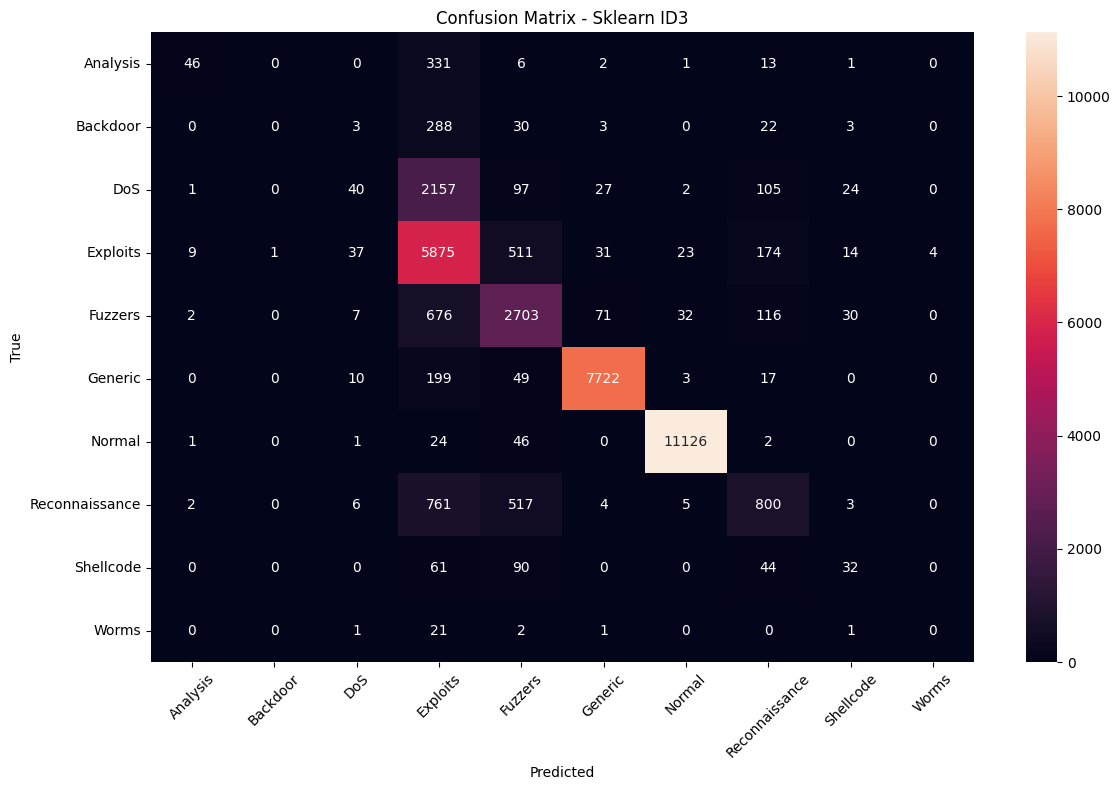

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Use same preprocessed data as our custom ID3
reducer = NetworkDimensionalityReducer(n_components=20)
X_train_reduced = reducer.fit_transform(train_set_clean)
X_val_reduced = reducer.transform(val_set_clean)

X_train = X_train_reduced.values
y_train = train_set_clean['attack_cat'].values
X_val = X_val_reduced.values
y_val = val_set_clean['attack_cat'].values

# Create and train sklearn's Decision Tree
sklearn_id3 = DecisionTreeClassifier(
    criterion='entropy',    # Use entropy (similar to ID3)
    max_depth=10,          # Same depth as our implementation
    random_state=42
)
sklearn_id3.fit(X_train, y_train)

# Make predictions
y_pred = sklearn_id3.predict(X_val)

# Print performance metrics
print("Sklearn ID3 Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_val, y_pred))

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_val, y_pred), 
            annot=True, 
            fmt='d',
            xticklabels=sklearn_id3.classes_,
            yticklabels=sklearn_id3.classes_)
plt.title('Confusion Matrix - Sklearn ID3')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [ ]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [ ]:
# Type your code here

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`